## DATA SCIENCE NANO DEGREE

### PROJECT 1: Boston AirBnB
##### MAHBUBUL WASEK

#### Introduction

This is part of the Udacity Data Science Nanodegree (Project 1). In this project we are supposed to analysis data using the CRISP-DM process. The CRISP-DM process:

1) Business Understanding 

2) Data Understanding

3) Prepare Data 

4) Data Modeling 

5) Evaluate the Results

6) Deploy

#### Business Understanding

AirBnB is an online rental marketplace, which created a community for a landlords and their tenants. Landlords are able to attract temporary tenants through this online platform. 

The main source of income for AirBnB is from the service fees charged to both guests and hosts. The peer-to-peer business model used by AirBnb has the potential for continued revenue growhth. 

In this project, I wanted to explore the data to answer the following questions:

##### 1) What has been the overall price trend in the given period of time? Is there any price trend in a week? If so, which days are more profitable?

##### 2) What is the relationship between price and various attributes?

##### 3) What are some of the common features that customers take into consideration for a good experience?

#### Data Understanding

We have 3 datasets for this project:

    i) Listings : Provides us with a number of columns containing detailed information about the rooms rented.
    
    ii) Reviews : Contains the reviews for the rooms along with unique id for customers.
    
    iii) Calendar : This provides us with the dates the rooms are available along with the price.



I will explore and try to visualize the data by presenting the results in the form of dashboards to answer the above questions.

In [1]:
#Loading the libraries

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Reading the datasets:
bost_listing = pd.read_csv('listings.csv')
bost_review = pd.read_csv('reviews.csv')
bost_calendar = pd.read_csv('calendar.csv')

In [11]:
num_rows_l = bost_listing.shape[0]
num_cols_l = bost_listing.shape[1]

num_rows_r = bost_review.shape[0]
num_cols_r = bost_review.shape[1]

num_rows_c = bost_calendar.shape[0]
num_cols_c = bost_calendar.shape[1]

print(num_rows_l, num_cols_l, num_rows_r, num_cols_r, num_rows_c, num_cols_c)

3585 95 68275 6 1308890 4


In [12]:
bost_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [13]:
bost_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [14]:
bost_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [15]:
bost_calendar.tail()

,listing_id,date,available,price
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN
1308889,14504422,2016-09-06,f,NaN


In [16]:
bost_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [17]:
# Check if price is NaN when available value is f:

calendar_q1 = bost_calendar.groupby('available')['price'].count().reset_index()
calendar_q1.columns = ['available', 'price_count']
calendar_q1

,available,price_count
0,f,0
1,t,643037


In [18]:
# How many rows per each listing:

calendar_q2 = bost_calendar.groupby('listing_id')['date'].count().reset_index()
calendar_q2['date'].value_counts()

365    3584
730       1
Name: date, dtype: int64

In [19]:
pd.options.display.max_columns = 95

In [20]:
bost_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [21]:
#Getting the columns in Listing dataset:
bost_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [22]:
#Converting amount columns from string to numbers:

bost_listing['price'] = bost_listing['price'].apply(str).str.replace("[$, ]", "").astype("float")
bost_listing['weekly_price'] = bost_listing['weekly_price'].apply(str).str.replace("[$, ]", "").astype("float")
bost_listing['monthly_price'] = bost_listing['monthly_price'].apply(str).str.replace("[$, ]", "").astype("float")
bost_listing['security_deposit'] = bost_listing['security_deposit'].apply(str).str.replace("[$, ]", "").astype("float")
bost_listing['cleaning_fee'] = bost_listing['cleaning_fee'].apply(str).str.replace("[$, ]", "").astype("float")
bost_listing['extra_people'] = bost_listing['extra_people'].apply(str).str.replace("[$, ]", "").astype("float") 


In [23]:
print(bost_listing['price'])

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64


In [24]:
#Dropping columns with all Null values:
bost_listing = bost_listing.dropna(how='all', axis=1)

In [26]:
#Dropping columns with 'url' in the name:
for col in bost_listing.columns: 
    if 'url' in col: 
        del bost_listing[col] 

In [28]:
#Dropping columns that I will not need:
useless_columns = ['scrape_id', 'last_scraped', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 
                  'host_acceptance_rate', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 
                 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'calendar_updated', 'calendar_last_scraped', 'review_scores_rating',
                   'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'require_guest_profile_picture',
                   'require_guest_phone_verification', 'calculated_host_listings_count']

bost_listing.drop(useless_columns, axis=1, inplace=True)

In [29]:
bost_listing.head()

,id,name,summary,space,description,host_id,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,instant_bookable,cancellation_policy,reviews_per_month
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",31303940,f,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,0,0,0,0,0,NaN,NaN,f,moderate,NaN
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,2572247,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,26,54,84,359,36,2014-06-01,2016-08-13,t,moderate,1.30
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",16701,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,19,46,61,319,41,2009-07-19,2016-08-05,f,moderate,0.47
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,6031442,f,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,75.0,NaN,NaN,100.0,50.0,2,25.0,1,1125,6,16,26,98,1,2016-08-28,2016-08-28,f,moderate,1.00
4,7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",15396970,t,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,79.0,NaN,NaN,NaN,15.0,1,0.0,2,31,13,34,59,334,29,2015-08-18,2016-09-01,f,flexible,2.25


In [30]:
bost_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   3585 non-null   int64  
 1   name                 3585 non-null   object 
 2   summary              3442 non-null   object 
 3   space                2528 non-null   object 
 4   description          3585 non-null   object 
 5   host_id              3585 non-null   int64  
 6   host_is_superhost    3585 non-null   object 
 7   property_type        3582 non-null   object 
 8   room_type            3585 non-null   object 
 9   accommodates         3585 non-null   int64  
 10  bathrooms            3571 non-null   float64
 11  bedrooms             3575 non-null   float64
 12  beds                 3576 non-null   float64
 13  bed_type             3585 non-null   object 
 14  amenities            3585 non-null   object 
 15  square_feet          56 non-null     f

In [31]:
len(bost_listing.columns)

35

-----

#### ANSWERING THE QUESTIONS: 

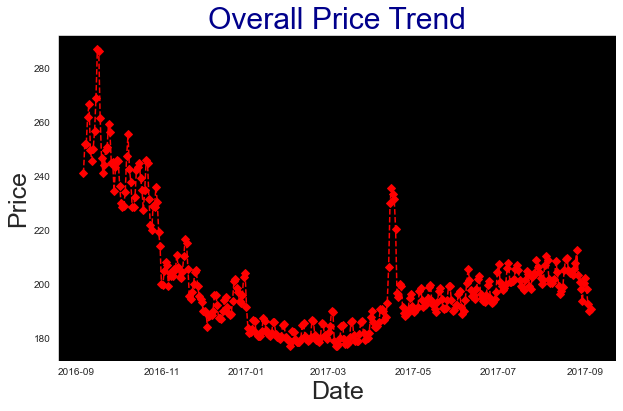

In [117]:
# Plot 1: Overall Price Trend:

sns.set_style("dark",{"axes.facecolor":"black"})

calendar_q1 = bost_calendar.copy(deep=True) 
calendar_q1.dropna(inplace=True)
calendar_q1['date'] = pd.to_datetime(calendar_q1['date'])
calendar_q1['price'] = calendar_q1['price'].map(lambda x: float(x[1:].replace(",", "")))

#Range 
start_date = '2016-09-05 00:00:00'
end_date = '2017-09-06 00:00:00'
calendar_q1 = calendar_q1[(calendar_q1['date'] > start_date) & (calendar_q1['date'] < end_date)]

calendar_q1 = calendar_q1.groupby('date')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(calendar_q1.date, calendar_q1.price, color = 'r', marker='D', ls='--', linewidth=1.5)
plt.title("Overall Price Trend", fontsize= 30, color= "DarkBlue")
plt.xlabel('Date', fontsize=25)
plt.ylabel('Price', fontsize=25)
plt.show()

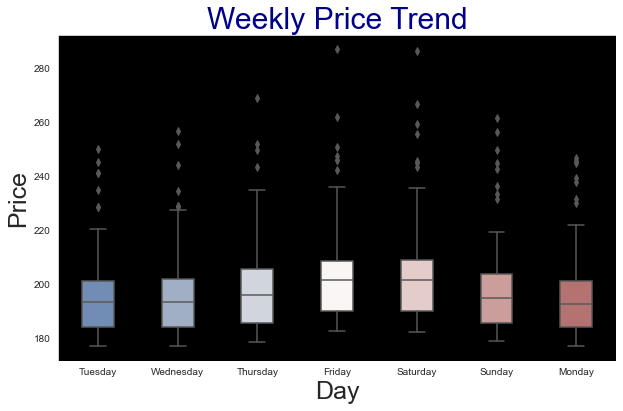

In [116]:
# Plot 2: Weekly Price Trend

sns.set_style("dark",{"axes.facecolor":"black"})
calendar_q1["weekday"] = calendar_q1["date"].dt.day_name()

plt.rcParams['figure.figsize'] = 10,6
sns.boxplot(x= 'weekday', y= 'price', data = calendar_q1, palette= "vlag", width=0.4)
plt.title("Weekly Price Trend", fontsize= 30, color= "DarkBlue")
plt.xlabel('Day', fontsize= 25)
plt.ylabel('Price', fontsize= 25)
plt.show()

The above 2 graphs provide us the price of AirBnB homes in Boston over a period of time. Plot 1 is a line graph which shows the price of AirBnB homes in Bostom over the time period of September 2016 to September 2017. It can be seen that the price of AirBnB homes has overall decreased in Boston from September 2016 to 2017. Starting at 240 in September 2016 and coming to below 200 a year later. The highest it reached was in 2016 at slightly above 280. Although, there was a substantial decrease from October 2016 to February 2017, the price experienced a slow increasing trend till September 2017. There was also a probable seasonal peak for few weeks in the price at the end of April 2017.

Plot 2 shows the weekly price trend for AirBnB homes in Boston. Plot 2 is a follow up to the overall trend of price for AirBnB homes in Boston. Plot 2 gives us a clear picture of how the price of AirBnB homes vary depending on the day of the week. The highest price for homes can be seen to be on Fridays and Saturdays at slightly above 200. The lowest price for homes are on Mondays with the mean price of around 190.

Text(0, 0.5, 'Price')

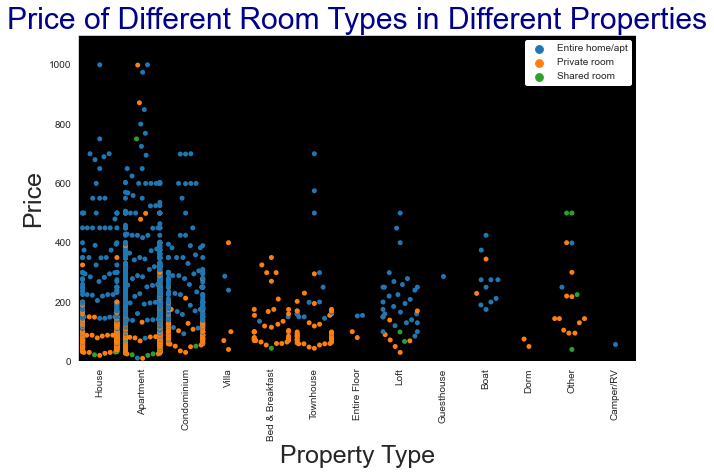

In [99]:
# Plot 3: Price Of Different Room Types In The Different Types Of Property:

sns.set_style("dark",{"axes.facecolor":"black"})
plt.rcParams['figure.figsize'] = 10,6
ax = sns.swarmplot(data=bost_listing, x="property_type", y="price", hue="room_type")
plt.xticks (rotation='vertical')
plt.ylim(0,1100)
plt.title("Price of Different Room Types in Different Properties", fontsize= 30, color= "DarkBlue")
plt.legend(framealpha=1, frameon=True, facecolor='white', edgecolor='white')
plt.xlabel('Property Type', fontsize= 25)
plt.ylabel('Price', fontsize= 25)


Plot 3 shows the price of different types of room for different AirBnB properties in Boston. There are mainly 3 types of room for the different AirBnB homes in Boston. The blue dots represent Entire Home or Apartment and seems to be the most available option in Boston followed by the orange dot representing Private Rooms. The least available AirBnB room type in Boston is Shared Room. 

Boston offers these 3 types of room to be rented in 13 different types of properties. The top 3 types of properties where rooms are rented in Boston are House, Apartment and Condominium. The other types of property in Boston includes Loft, Bed & Breakfast, Townhouse, Boat, Villa, Entire Floor, Dorm, Guesthouse, Camper/RV and Others. Another valueable information which can be deduced from Plot 3, is the difference in price among the 3 types of room in these different properties in Boston.  

Text(0, 0.5, 'Price')

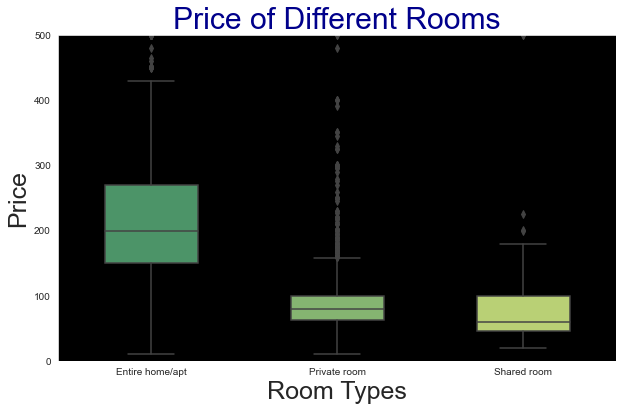

In [106]:
# Plot 5: Price of Different Rooms:

sns.set_style("dark",{"axes.facecolor":"black"})
w = sns.boxplot(data=bost_listing, x='room_type', y='price', palette='summer', width= 0.5)
plt.rcParams['figure.figsize'] = 10,6
plt.ylim(0,500)
plt.title("Price of Different Rooms", fontsize= 30, color= "DarkBlue")
plt.xlabel('Room Types', fontsize= 25)
plt.ylabel('Price', fontsize= 25)

Plot 5 shows a boxplot graph plotted to investigate the information gained from Plot 4. Plot 5 confirms the price trend observed for the different types of room in Plot 4. It can be seen that among the 3 types of room, Entire Home/Apt has the highest mean price of around 200 followed by Private Room with price around a little less than 100. The price for Shared Room in Boston AirBnB homes seems to be around 50. 

Text(28.852430555555564, 0.5, 'Number of Beds')

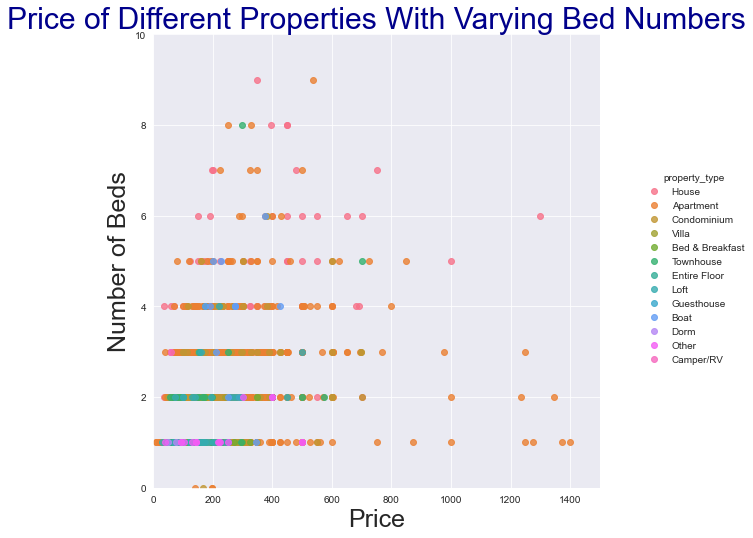

In [97]:
# Plot 4: Price of Different Properties with the Number of Beds

sns.set_style("darkgrid")
vis2 = sns.lmplot(data= bost_listing, x='price', y='beds',
                 fit_reg=False, hue="property_type", size=7, aspect=1)
plt.ylim(0,10)
plt.xlim(0,1500)
plt.title("Price of Different Properties With Varying Bed Numbers", fontsize= 30, color= "DarkBlue")
plt.xlabel('Price', fontsize= 25)
plt.ylabel('Number of Beds', fontsize= 25)

Plot 4 displays the Different Property prices for the number of beds. It can be seen that most of the AirBnB homes rented in Boston had only 1 bed with varying prices mostly between 600. Most of the Townhouse, Entire floor, Loft and Guesthouse offered 2 beds with the price similar to properties with 1 bed. However, most of the AirBnB homes offering 3 beds were Apartment and Condominium with varying price range between 400. A similar price trend can be seen in AirBnB homes offering 4 beds with few boats along with Condominium and Villas among the property types. 

Text(0, 0.5, 'Price')

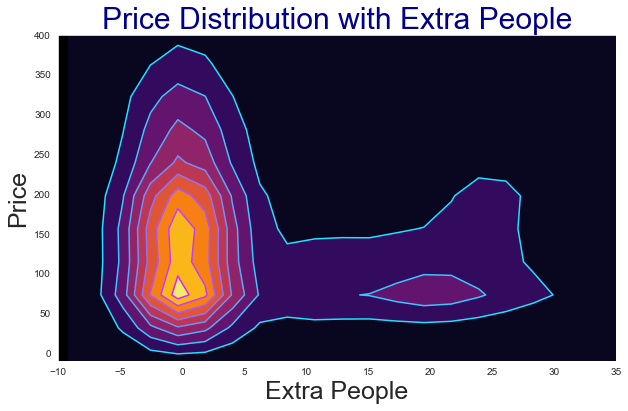

In [115]:
# Plot 6: Price Distribution with Extra People: 

k3= sns.kdeplot(bost_listing.extra_people, bost_listing.price, shade=True, shade_lowest=True, cmap='inferno')
k3b= sns.kdeplot(bost_listing.extra_people, bost_listing.price, cmap='cool')

plt.ylim(-10,400)
plt.xlim(-10,35)
plt.title("Price Distribution with Extra People", fontsize= 30, color= "DarkBlue")
plt.xlabel('Extra People', fontsize= 25)
plt.ylabel('Price', fontsize= 25)

Plot 6 shows us a Kernel Density Estimation (KDE) graph of Extra People and Price. It tells us how having Extra People effects the price of the AirBnB homes in Boston. We can see that if there are 0 extra people then the lower density of price is stretched from the minimum at 0 to the highest density at around 400. If we move to the right and increase the extra people to 5 we see that the lower density of price is  at 25 and the higher density of price at around 275. If wee keep mmoving further to 10 extra people the lower density of price seems to stay similar but the higher density of price decreases to around 150. It is a very interesting observation as the price density narrows down if we keeping increasing the number of extra people to 30.

In [108]:
# Plot 7: Extracting Common Words from the 'Comment' Column:


## Loading the necessary libraries

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 

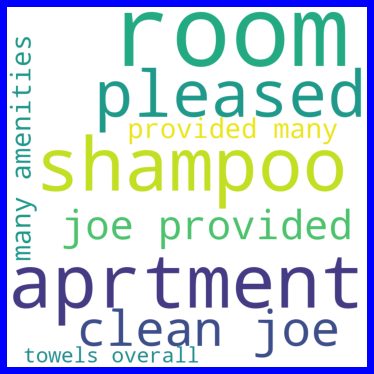

In [113]:
for val in bost_review.comments: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (5, 8), facecolor ='B') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

Plot 7 is word cloud which derived the most common words from the 'Comment' column of the reviews from the customers. Plot 7 provides us the criteria which matters to customers when giving reviews. A good observation which can be deduced from the reviews is that customers seem to have a good experience if the AirBnB home is clean and amenities are provided. In order to please the customers, the host can include amenities along with shampoo and towels. 

----

#### Linear Regression Model

In [118]:
bost_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   3585 non-null   int64  
 1   name                 3585 non-null   object 
 2   summary              3442 non-null   object 
 3   space                2528 non-null   object 
 4   description          3585 non-null   object 
 5   host_id              3585 non-null   int64  
 6   host_is_superhost    3585 non-null   object 
 7   property_type        3582 non-null   object 
 8   room_type            3585 non-null   object 
 9   accommodates         3585 non-null   int64  
 10  bathrooms            3571 non-null   float64
 11  bedrooms             3575 non-null   float64
 12  beds                 3576 non-null   float64
 13  bed_type             3585 non-null   object 
 14  amenities            3585 non-null   object 
 15  square_feet          56 non-null     f

In [119]:
df = bost_listing.copy()

In [128]:
useless_columns1 = ['name', 'summary', 'space', 'description', 'host_id', 'host_is_superhost', 'property_type', 'room_type', 'bed_type', 'amenities', 'first_review', 'last_review', 'instant_bookable', 'cancellation_policy']

df.drop(useless_columns1, axis=1, inplace=True)

In [130]:
# Fill the mean of the columns for any missing values

fill_mean = lambda col: col.fillna(col.mean())

df = df.apply(fill_mean, axis=0)

In [131]:
# Setting X variables
X = df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people']]

In [132]:
# Setting y variable

y = df['price']

In [133]:
# Creating train and test sets of data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [134]:
# Instantiate a Linear Regression model with normalized data

lm_model = LinearRegression (normalize=True)

In [135]:
# Fit model to the training data

lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [144]:
# Predict the response for the training data and the test data

y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

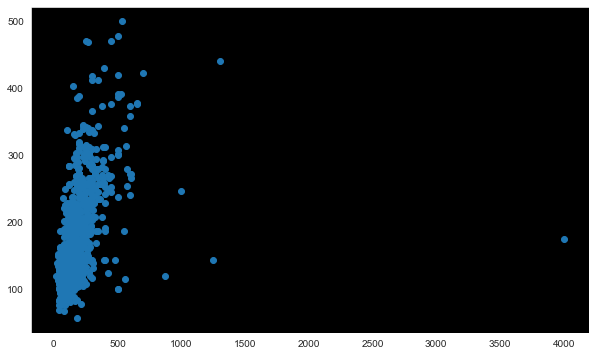

In [142]:
# Comparing the values of the y_test_preds (Y Prediction) with the y_test values:

plt.scatter(y_test, y_test_preds)

In [139]:
# Obtain an r-squared value for both the training and test data

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("Training R2 {}. Test R2 {}.".format(train_score, test_score))

Training R2 0.27363955935152584. Test R2 0.19501791226572707.


The predicted values from the Linear Regression Model created is quite far away from the Actual Values. The model has a lot of scope of being improved